In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Activation,Flatten,Conv2D,MaxPooling2D,Dropout,Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array , load_img
from keras import backend as K
from keras.preprocessing import image
from keras.models import Sequential,load_model
from keras.callbacks import EarlyStopping

In [68]:
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
cd /content/drive/My Drive/dnn

/content/drive/My Drive/dnn


In [4]:
base_path = 'dataset'
train_path = 'dataset/train'
test_path = 'dataset/test'

In [5]:
img_width,img_height=150,150
batch_size=10

In [6]:
 input_shape=(img_width,img_height,3)

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,rotation_range=30)

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True)
image = test_datagen.flow_from_directory(test_path,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 53 images belonging to 2 classes.


In [9]:
train_generator=train_datagen.flow_from_directory(train_path,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(test_path,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 438 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


In [96]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())#2-d array to 1-d array
model.add(Dense(128,activation='relu')) # 32*2*2
model.add(Dense(1,activation='sigmoid')) # 32-nodes to 1 final node
 # relu-0 or 1,sigmoid- Probability
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               10616960  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [97]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [98]:
from matplotlib import pyplot

In [211]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
history=model.fit_generator(train_generator,epochs=50,validation_data=validation_generator,callbacks=[earlystopping])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
 6/44 [===>..........................] - ETA: 18s - loss: 0.3384 - accuracy: 0.9000

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


44/44 [==============================] - 24s 537ms/step - loss: 0.3356 - accuracy: 0.8790 - val_loss: 0.1423 - val_accuracy: 0.9245
Epoch 2/50
44/44 [==============================] - 24s 535ms/step - loss: 0.2671 - accuracy: 0.8813 - val_loss: 0.1794 - val_accuracy: 0.9245
Epoch 3/50
44/44 [==============================] - 24s 536ms/step - loss: 0.2904 - accuracy: 0.8973 - val_loss: 0.1366 - val_accuracy: 0.9434
Epoch 4/50
44/44 [==============================] - 24s 539ms/step - loss: 0.2938 - accuracy: 0.8721 - val_loss: 0.1424 - val_accuracy: 0.9623
Epoch 5/50
44/44 [==============================] - 24s 534ms/step - loss: 0.3115 - accuracy: 0.8699 - val_loss: 0.1929 - val_accuracy: 0.9245
Epoch 6/50
44/44 [==============================] - 24s 537ms/step - loss: 0.3192 - accuracy: 0.8630 - val_loss: 0.4192 - val_accuracy: 0.7736
Epoch 7/50
44/44 [==============================] - 24s 536ms/step - loss: 0.3329 - accuracy: 0.8630 - val_loss: 0.1599 - val_accuracy: 0.9623
Epoch 8/50

In [212]:
cd /content/drive/My Drive/dnn

/content/drive/My Drive/dnn


In [213]:
model.save('2.h5')

In [152]:
cd /content/drive/My Drive/dnn

/content/drive/My Drive/dnn


In [216]:
def pred_clean(pred):
  if pred > 0.6:
    return 1
  else:
    return 0

def pred_class(pred):
  res = pred_clean(pred)
  labels = ['Bullying','Non-Bullying']
  return labels[res]

In [217]:
cd /content/drive/My Drive/dnn/dataset/train/NoBulling

/content/drive/My Drive/dnn/dataset/train/NoBulling


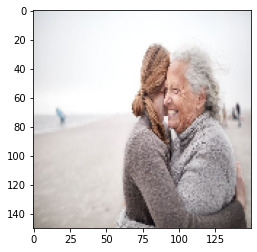

In [218]:
img_file = '/content/drive/My Drive/dnn/dataset/train/NoBulling/0_Affectionate-grandmother-and-granddaughter-hugging-on-the-beach.jpg'
image = load_img(img_file,target_size=(150,150))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image,axis=0)
image = image / 255

In [219]:
res = model.predict(image)
print(res[0])

[0.98045135]


In [220]:
pred = pred_class(res)
pred

'Non-Bullying'

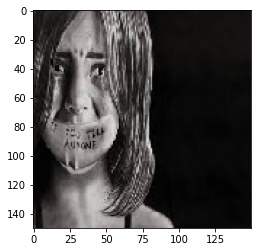

In [221]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array , load_img
img_file = '/content/drive/My Drive/dnn/dataset/train/Bulling/10 (1).jfif'
image = load_img(img_file,target_size=(150,150))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image,axis=0)
image = image / 255

In [222]:
res = model.predict(image)
print(res[0])

[5.2571902e-09]


In [223]:
pred = pred_class(res)
pred

'Bullying'

In [238]:
cd /content/drive/My Drive/dnn/dataset/train/NoBulling

/content/drive/My Drive/dnn/dataset/train/NoBulling


In [239]:
import os
folder_path='/content/drive/My Drive/dnn/dataset/train/NoBulling'
images = []
for i in os.listdir(folder_path):
    i = load_img(i,target_size=(150,150))
    i = img_to_array(i)
    i = np.expand_dims(i, axis=0)
    i=i/255
    images.append(i)
images = np.vstack(images)
res = model.predict(images, batch_size=10)
NonBullying_res=res
print(res)

[[0.9386332 ]
 [0.81393313]
 [0.9804514 ]
 [0.8652618 ]
 [0.9999974 ]
 [0.6929323 ]
 [0.9360451 ]
 [0.99205947]
 [0.99938154]
 [0.9991473 ]
 [1.        ]
 [0.9996673 ]
 [0.9998367 ]
 [0.7897912 ]
 [0.9926011 ]
 [0.99920917]
 [0.9575883 ]
 [0.9995946 ]
 [0.9999998 ]
 [0.99936604]
 [0.9999878 ]
 [0.9999056 ]
 [0.99428225]
 [0.9883074 ]
 [0.9992262 ]
 [0.4732993 ]
 [0.94414616]
 [0.99723136]
 [1.        ]
 [0.9629692 ]
 [0.70761395]
 [0.99976575]
 [0.9999821 ]
 [0.9943589 ]
 [0.98974234]
 [0.98042333]
 [0.9813353 ]
 [0.99850464]
 [0.8621814 ]
 [0.999144  ]
 [0.9988506 ]
 [0.9294612 ]
 [0.9833499 ]
 [0.97486067]
 [0.9990274 ]
 [0.9617549 ]
 [0.6829542 ]
 [0.97815585]
 [0.99994373]
 [0.76170707]
 [0.9968909 ]
 [0.9999232 ]
 [0.98124367]
 [0.96747434]
 [0.9780879 ]
 [0.9603218 ]
 [0.9971122 ]
 [0.99995685]
 [0.63677156]
 [0.9998843 ]
 [0.98094434]
 [0.9848101 ]
 [0.9983024 ]
 [0.88363135]
 [0.96255064]
 [0.99410063]
 [0.99941635]
 [0.99353725]
 [0.9929123 ]
 [0.99938357]
 [0.9981444 ]
 [0.97

In [240]:
cd /content/drive/My Drive/dnn/dataset/train/Bulling

/content/drive/My Drive/dnn/dataset/train/Bulling


In [241]:
import os
folder_path='/content/drive/My Drive/dnn/dataset/train/Bulling'
images = []
for i in os.listdir(folder_path):
    i = load_img(i,target_size=(150,150))
    i = img_to_array(i)
    i = np.expand_dims(i, axis=0)
    i=i/255
    images.append(i)
images = np.vstack(images)
res = model.predict(images, batch_size=10)
Bullying_res=res
print(res)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


[[2.37792730e-04]
 [1.31695867e-02]
 [2.51871347e-03]
 [1.16031494e-07]
 [2.23875046e-03]
 [3.65568697e-02]
 [2.27131204e-05]
 [3.96758318e-04]
 [3.51874948e-01]
 [3.77742754e-06]
 [4.24606323e-01]
 [1.22687221e-03]
 [6.91648126e-02]
 [3.84545056e-05]
 [1.79784596e-02]
 [5.29396534e-03]
 [4.29989768e-08]
 [2.28618085e-02]
 [2.29471326e-02]
 [1.26538953e-06]
 [4.45896029e-01]
 [2.09469690e-05]
 [2.44867802e-03]
 [1.75102778e-05]
 [5.34808636e-03]
 [8.83917689e-01]
 [2.79449814e-08]
 [3.54675025e-01]
 [8.07517767e-03]
 [6.05736732e-01]
 [1.48602552e-07]
 [1.30932987e-01]
 [5.93594074e-01]
 [3.75936031e-02]
 [9.29109156e-02]
 [6.86602652e-05]
 [1.27673149e-03]
 [5.17636538e-04]
 [4.56584245e-01]
 [1.04747727e-04]
 [3.06673944e-02]
 [5.41372716e-01]
 [1.88700557e-02]
 [2.36183405e-04]
 [1.27008796e-01]
 [3.12405825e-03]
 [2.76596278e-01]
 [9.86403227e-03]
 [9.49910554e-06]
 [1.86926723e-02]
 [4.18430567e-03]
 [2.83943117e-02]
 [2.70493329e-02]
 [5.36099970e-02]
 [4.49775980e-05]
 [6.604173

In [229]:
cd /content/drive/My Drive/dnn/dataset/test/Bulling

/content/drive/My Drive/dnn/dataset/test/Bulling


In [230]:
import os
folder_path='/content/drive/My Drive/dnn/dataset/test/Bulling'
images = []
for i in os.listdir(folder_path):
    i = load_img(i,target_size=(150,150))
    i = img_to_array(i)
    i = np.expand_dims(i, axis=0)
    i=i/255
    images.append(i)
images = np.vstack(images)
res = model.predict(images, batch_size=10)
Bullying_res=res
#print(res)

In [231]:
cd /content/drive/My Drive/dnn/dataset/test/NoBulling

/content/drive/My Drive/dnn/dataset/test/NoBulling


In [232]:
import os
folder_path='/content/drive/My Drive/dnn/dataset/test/NoBulling'
images = []
for i in os.listdir(folder_path):
    i = load_img(i,target_size=(150,150))
    i = img_to_array(i)
    i = np.expand_dims(i, axis=0)
    i=i/255
    images.append(i)
images = np.vstack(images)
res = model.predict(images, batch_size=10)
NonBullying_res=res
#print(res)

In [252]:
#test-accuracy
#class-wise accuracy based on the threshold - Bullying
i=0
B_count=0
for i in range(len(Bullying_res)):
    if(Bullying_res[i]<=0.5):
      B_count+=1
print((B_count/len(Bullying_res))*100)

97.36842105263158


In [253]:
i=0
NB_count=0
for i in range(len(NonBullying_res)):
    if(NonBullying_res[i]>0.5):
      NB_count+=1
print((NB_count/len(NonBullying_res))*100)

96.27906976744185


In [254]:
total_accuracy=(B_count+NB_count)/(len(Bullying_res)+len(NonBullying_res))*100
print(total_accuracy)

96.83972911963883
